<figure>
  <img src='img/pandas.png' alt='logomarca do pandas' height="200px">
    <figcaption style="text-align:center;font-family:'Times New Roman';color:blue">Por: <b>Cláudio Fleury</b>, Dez/20</figcaption>
</figure>

<h2 style="color:blue; background-color:#F3F2F9">Apresentação</h2>

O **Pandas** é um pacote direcionado à análise de dados rápida, poderosa, flexível e de fácil uso, construída sobre o **NumPy**, e que amplia os recursos dele. **Pandas** significa dados em painel ou tabela. Ele adota o estilo idiomático de computação baseada em arranjos do **NumPy**. Embora o **Pandas** adote o idioma **NumPy**, a maior diferença entre eles é que o **Pandas** foi projetado para trabalhar com dados tabulares e heterogêneos, enquanto o **NumPy** trabalhe com dados em matriz numérica homogênea.

O **Pandas** é um pacote Python (biblioteca) que fornece estruturas de dados rápidas, flexíveis e expressivas, projetadas para tornar o trabalho com dados **relacionais** ou **rotulados** fácil e intuitivo. Tem por objetivo tornar-se o alicerce em Python na análise prática de dados do mundo real. 

O pacote **Pandas** é adequado para a análise de muitos tipos diferentes de dados: 
- Dados tabulares com colunas de tipos heterogêneos, como numa tabela SQL ou planilha do Excel.   
- Dados de séries temporais ordenados e não ordenados (não necessariamente de frequência fixa).  
- Dados de matriz arbitrária (homogeneamente digitados ou heterogêneos) com rótulos de linha e coluna.  
- Qualquer outra forma de conjuntos de dados observacionais/estatísticos. Os dados realmente não precisam ser rotulados para serem colocados numa estrutura de dados **Pandas**.  

Este *notebook* tem por objetivos: 
- Apresentar as estruturas de dados do **Pandas**: <font style="background-color:yellow;"> _DataFrame_  e *Series*</font>. 
- Acessar e manipular dados via _DataFrame_ e _Series_. 
- Importar dados CSV (*Common Separated Values*) para um _DataFrame_. 
- Reindexar um _DataFrame_ para misturar dados.

Documentação Oficial do [Pandas](https://pandas.pydata.org/pandas-docs/stable/).

<h2 style="color:blue; background-color:#F3F2F9">Instalação do Pandas</h2>

O pacote **Pandas** faz parte da distribuição Anaconda e pode ser instalado com o Anaconda ou com o Miniconda:   

```conda install pandas```

O pacote **Pandas** também pode ser instalado via **pip** do [PyPI](https://pypi.org) (_Python Package Index_ - é um repositório de softwares para a linguagem de programação Python).

```pip install pandas```

<h2 style="color:blue; background-color:#F3F2F9">Importando o Pacote Pandas</h2>

Geralmente, a biblioteca **Pandas** é importada com apelido **pd**, permitindo o acesso às funções, classes e subpacotes na biblioteca **Pandas** usando `pd.namespace`.
Exemplo: `pd.Series(), pd.DataFrame(), pd.DataFrame.index`.

In [2]:
import pandas as pd
import numpy  as np
print(f"Versões: Pandas - {pd.__version__}, NumPy - {np.__version__}")

Versões: Pandas - 1.5.0, NumPy - 1.21.2


<h1 style="color:blue; background-color:#E0DBF9; text-align:center">1. Introdução</h1>
<h2 style="color:blue; background-color:#F3F2F9">1.0 Objetos do Pandas</h2>  

Existem três estruturas de dados principais em **Pandas**:
* **Series** (1D): objeto projetado para representar estruturas de dados unidimensionais, semelhantes a um vetor, mas com alguns recursos adicionais. Componentes de uma série (dois vetores): valores e índice.
* **DataFrame** (2D):
* **Panel** (3D):

Uma **Serie** é um arranjo rotulado unidimensional capaz de armazenar dados de qualquer tipo (*integer, string, float, objetos python,* etc.). Os rótulos de eixo são chamados coletivamente de índice. Em termos de estrutura de dados **Pandas**, as **Series** representam uma única coluna na memória, que é independente ou pertencente a um **DataFrame Pandas**.

Um **DataFrame** é uma estrutura de dados que organiza os dados em uma tabela bidimensional (linhas e colunas), como uma planilha. Os dataframes são as estruturas de dados mais comumente usadas na análise de dados moderna porque são uma maneira flexível e intuitiva de se armazenar e trabalhar com dados.

As estruturas de dados de pandas mais usadas são as **Series** e o **DataFrame**. Resumindo, uma série é semelhante a uma única coluna de dados, um *dataframe* é semelhante a uma planilha com linhas e colunas, enquanto um **Panel** pode ter muitos *dataframes*.
<figure>
  <img src='img/objetos_pandas.png' alt='logomarca do pandas' height="200px">
    <figcaption style="text-align:center;font-family:'Times New Roman';color:blue">Objetos Pandas</figcaption>
</figure>

<h2 style="color:blue; background-color:#F3F2F9">1.1 Criando Objetos</h2>

## Series
Comando para criar uma estrutura de dados **Series**:
```python
pd.Series(data=..., index=..., dytpe=..., name=...)
```
Para criar uma série, chamamos o construtor da classe `Series()` e passamos um argumento contendo os dados a serem incluídos nela, podendo ser uma das opções: um `ndarray` unidimensional, uma lista, um dicionário ou um valor escalar. 

Se um índice não for especificado, o índice padrão `[0,… n-1]` será criado, onde `n` é o comprimento dos dados. Uma série pode ser criada a partir de uma variedade de fontes, conforme mostrado a seguir.

### Série a partir de Lista
Criando uma Série (***Series***) a partir de uma <font style="background:yellow">lista de valores</font>, com os **Pandas** criando um índice com valores inteiro (padrão):

In [4]:
s1 = pd.Series([1, 3, 5, np.nan, 6, 8, -np.inf])
s1

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
6   -inf
dtype: float64

### <i>Dataframe</i> a partir de Matriz
Criando um Quadro de Dados (***DataFrame***) a partir de um <font style="background:yellow">_array_ NumPy</font>, com um índice temporal (datas) e colunas rotuladas:

In [5]:
N = 6                                          # quantidade de linhas no dataframe
datas = pd.date_range("20220519", periods=N)   # índice para o dataframe, qtde de períodos: N (6)
print(datas)
df1 = pd.DataFrame(np.random.randn(N, 4), index=datas, columns=list("ABCD"))  # dataframe
print('\n',df1)
df1                                            # mostra o dataframe em forma de tabela formatada

DatetimeIndex(['2022-05-19', '2022-05-20', '2022-05-21', '2022-05-22',
               '2022-05-23', '2022-05-24'],
              dtype='datetime64[ns]', freq='D')

                    A         B         C         D
2022-05-19 -0.127538  0.235869  0.994635 -0.306415
2022-05-20 -1.031509  0.851076  0.802743 -0.429228
2022-05-21  0.625001 -0.115407  0.474596 -0.061233
2022-05-22 -0.391846  0.716686 -1.415814 -0.140749
2022-05-23 -0.614443  0.135536 -0.863127 -0.293491
2022-05-24 -0.243020  0.222601  1.023760 -0.114050


,A,B,C,D
2022-05-19,-0.127538,0.235869,0.994635,-0.306415
2022-05-20,-1.031509,0.851076,0.802743,-0.429228
2022-05-21,0.625001,-0.115407,0.474596,-0.061233
2022-05-22,-0.391846,0.716686,-1.415814,-0.140749
2022-05-23,-0.614443,0.135536,-0.863127,-0.293491
2022-05-24,-0.243020,0.222601,1.023760,-0.114050


### <i>Dataframe</i> a partir de Dicionário
Criando um Quadro de Dados (***DataFrame***) a partir de um <font style="background:yellow">dicionário de objetos</font>, os quais podem ser convertidos numa estrutura de série (índice e valor):

In [6]:
dic1 = { "A": 1.0,
         "B": pd.Timestamp("20220519"),
         "C": pd.Series([10,200,3000,40000], index=list(range(4)), dtype="float32"),
         "D": np.array([3] * 4, dtype="int32"),
         "E": pd.Categorical(["teste", "treino", "desenv", "exec"]),
         "F": "qq. coisa", }
df2 = pd.DataFrame(dic1)
df2

,A,B,C,D,E,F
0,1.0,2022-05-19,10.0,3,teste,qq. coisa
1,1.0,2022-05-19,200.0,3,treino,qq. coisa
2,1.0,2022-05-19,3000.0,3,desenv,qq. coisa
3,1.0,2022-05-19,40000.0,3,exec,qq. coisa


In [10]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### <i>Dataframe</i> a partir de arquivo CSV
Os arquivos **CSV** são conjuntos de dados com "valores separados por vírgulas - *comma separated values*", e podem ser vistos como planilhas Excel.  

Na Ciência de Dados, geralmente precisamos lidar com enormes conjuntos de dados enquanto se analisa tais dados, os quais normalmente são obtidos no formato **CSV**.  

A criação de um *dataframe* do **Pandas** usando arquivos **CSV** pode ser realizada de várias maneiras.  

**Nota**: o conjunto de dados (*dataset*) usado no exemplos seguintes contém 25 itens de auto-relato de personalidade retirados do *International Personality Item Pool* (ipip.ori.org) e que foram incluídos como parte do projeto de avaliação de personalidade baseado na web do *Synthetic Aperture Personality Assessment* (SAPA). Os dados de 2.800 indivíduos foram incluídos como um conjunto de demonstração para construção de escala, análise fatorial e análise da Teoria de Resposta ao Item. Três variáveis demográficas adicionais (sexo: 1 = Homens e 2 = Mulheres, educação: 1 = Fundamental, 2 = Fundamental Completo, 3 = Ens. Médio, 4 = Ens. Médio Completo, 5 = Superior Completo; e idade) também foram incluídas.

In [5]:
''' Primeira forma: '''
import pandas as pd

bfi ='https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv'
df = pd.read_csv(bfi)
# head() exibe apenas as 5 primeiras linhas do dataframe...
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [6]:
''' Segunda forma: '''
df = pd.read_table(bfi, delimiter =", ", engine='python')
print(df.head())

  "","A1","A2","A3","A4","A5","C1","C2","C3","C4","C5","E1","E2","E3","E4","E5","N1","N2","N3","N4","N5","O1","O2","O3","O4","O5","gender","education","age"
0  "61617",2,4,3,4,4,2,3,3,4,4,3,3,3,4,4,3,4,2,2,...                                                                                                        
1  "61618",2,4,5,2,5,5,4,4,3,4,1,1,6,4,3,3,3,3,5,...                                                                                                        
2  "61620",5,4,5,4,4,4,5,4,2,5,2,4,4,4,5,4,5,4,2,...                                                                                                        
3  "61621",4,4,6,5,5,4,4,3,5,5,5,3,4,4,4,2,5,2,4,...                                                                                                        
4  "61622",2,3,3,4,5,4,4,5,3,2,2,2,5,4,5,2,3,4,4,...                                                                                                        


<h2 style="color:blue; background-color:#F3F2F9">1.2 Visualizando Dados</h2>

Como visualizar as linhas de dados iniciais e finais de um quadro:

In [64]:
df1.head()          # cabeça --> cinco primeiras linhas do quadro (sem parâmetro)

,A,B,C,D
2022-05-19,-0.771333,1.340197,-0.986804,0.744150
2022-05-20,-1.062793,1.133589,-1.125380,0.792802
2022-05-21,-0.183818,0.249337,0.624719,-0.025290
2022-05-22,0.120645,0.956873,-1.118796,0.522675
2022-05-23,0.133035,0.289821,0.487587,-0.722973


In [65]:
df1.tail(3)         # calda  --> três últimas linhas do quadro (parâmetro 3)

,A,B,C,D
2022-05-22,0.120645,0.956873,-1.118796,0.522675
2022-05-23,0.133035,0.289821,0.487587,-0.722973
2022-05-24,-0.733022,0.721735,-1.202797,0.256383


Mostrando os índices e os rótulos das colunas do quadro:

In [19]:
df.index

DatetimeIndex(['2022-05-19', '2022-05-20', '2022-05-21', '2022-05-22',
               '2022-05-23', '2022-05-24'],
              dtype='datetime64[ns]', freq='D')

In [20]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

<h1 style="color:blue; background-color:#E0DBF9; text-align:center">2. Fundamentos</h1>

Existem dois tipos principais de estruturas de dados no **pandas**:
 1. ***Series***: são matrizes unidimensionais rotuladas, capazes de armazenar dados de qualquer tipo (inteiro, string, float, objetos python etc.). Os rótulos dos eixos são chamados de índices. Fazendo uma analogia com uma planilha de dados (tipo EXCEL, ou CALC), uma **série** representa uma coluna na planilha, e seus índices seriam a identificação das linhas (numeração) e colunas (letras).  
 
   
 2. ***DataFrames***: são estruturas de dados bidimensional (tabelas) potencialmente heterogêneas e de tamanho variável com eixos rotulados (linhas e colunas). São semelhantes a matrizes, com colunas nominadas e contendo dados de tipos diferentes. Um _dataframe_ pode ser visto como uma tabela de um banco de dados, em que cada linha corresponde a um registo (linha) da tabela.
 
<h2 style="color:blue; background-color:#F3F2F9">2.1 Série</h2>

* Criando uma __Série de Dados__ a partir de uma lista de valores, fazendo com que o **pandas** crie um índice inteiro padrão:

In [67]:
s2 = pd.Series([7.88, 5.21, 6.85, 5.90,  6.28, 8.46, 7.08, 3.41, 5.11, 8.11])
s2

0    7.88
1    5.21
2    6.85
3    5.90
4    6.28
5    8.46
6    7.08
7    3.41
8    5.11
9    8.11
dtype: float64

<h2 style="color:blue; background-color:#F3F2F9">Estruturas de Dados - <i>Dataframes</i></h2>  

O __Dataframe__ é uma estrutura de dados com representação tabular bidimensional de dados (dados alinhados em linhas e colunas), potencialmente heterogênea, e de tamanho mutável (ao contrário da __série de dados__ que não permite operações que alterem seu tamanho). Você pode imaginá-lo como uma tabela em um banco de dados ou uma planilha. 

<img src="img/dataframe.png" width=500px>  
Os dados estão disponíveis em várias formas e tipos, como arquivos CSV ou JSON, tabelas SQL ou estruturas Python como **list**, **dict**, **array** etc. Precisamos converter todos esses formatos de dados diferentes em um **DataFrame** para que possamos usar a biblioteca **pandas** na análise eficiente desses dados.

<h3 style="color:blue; background-color:#F3F2F9">Construtor da Classe DataFrame</h3>

`pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=False)`

* Criando um __DataFrame__ a partir de uma matriz NumPy, com índice `datetime` e colunas rotuladas:

In [68]:
semana = ["S1","S2","S3","S4","S5","S6","S7"]
semana

['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7']

In [74]:
dados = {"Nome":["João","Maria","Samuel","José","Mônica","Manoel","Jussara"],
         "Idade":[20,21,19,20,22,14,16],
         "Naturalidade":["Goiânia","Anápolis","Rio Verde","Goiânia","Jataí","",""],
         "Peso":[67,72,58,93,55,42,44]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
        }
df_exemplo = pd.DataFrame(dados, index=semana) #, columns=list("ABCD"))
df_exemplo

,Nome,Idade,Naturalidade,Peso
S1,João,20,Goiânia,67
S2,Maria,21,Anápolis,72
S3,Samuel,19,Rio Verde,58
S4,José,20,Goiânia,93
S5,Mônica,22,Jataí,55
S6,Manoel,14,,42
S7,Jussara,16,,44


* Criando um __DataFrame__ a partir de um dicionário de objetos que podem ser convertidos em séries.

In [5]:
df2 = pd.DataFrame( {
   ...:         "A": 1.0,
   ...:         "B": pd.Timestamp("20210101"),
   ...:         "C": pd.Series(1, index=list(range(4)), dtype=np.int32),
   ...:         "D": np.array([55,56,57,58], dtype="int32"),
   ...:         "E": pd.Categorical(["teste", "treino", "sorteio", "descanso"]),
   ...:         "F": True
   ...:           } )
print(df2.head())
df2.query('D in [55,57]')

     A          B  C   D         E     F
0  1.0 2021-01-01  1  55     teste  True
1  1.0 2021-01-01  1  56    treino  True
2  1.0 2021-01-01  1  57   sorteio  True
3  1.0 2021-01-01  1  58  descanso  True


,A,B,C,D,E,F
0,1.0,2021-01-01,1,55,teste,True
2,1.0,2021-01-01,1,57,sorteio,True


As colunas do __DataFrame__ (quadro de dados) resultante têm diferentes tipos de dados.

In [32]:
    df2.dtypes

A           float64
B    datetime64[ns]
C             int32
D             int32
E          category
F              bool
dtype: object

Mais um exemplo de criação de __Dataframe__ a partir de um dicionário:

In [10]:
# Objeto dicionário Python
alunos_dic = {'Nome': ['José', 'Maria'], 'Idade': [20, 21], 'Notas': [85.10, 77.80]}
print(alunos_dic)

# Criação do DataFrame a partir do dicionário
alunos_df = pd.DataFrame(alunos_dic)
print("\n", alunos_df)

{'Nome': ['José', 'Maria'], 'Idade': [20, 21], 'Notas': [85.1, 77.8]}

     Nome  Idade  Notas
0   José     20   85.1
1  Maria     21   77.8


As strings 'Nome', 'Idade' e 'Notas' são chaves no dicionário e tornam-se rótulos das colunas no __DataFrame__.  

* Criando um *DataFrame* a partir de valores aleatórios e denominações de colunas.

In [77]:
df3 = pd.DataFrame(np.random.randn(6,4), columns=['P1','P2','P3','P4'])
df3

,P1,P2,P3,P4
0,-0.564441,0.265615,1.386442,0.282174
1,-1.382435,-1.142332,0.260108,1.407262
2,1.016073,0.517517,0.045577,1.033788
3,0.214777,0.955798,-1.117217,0.956063
4,-1.514790,1.025568,2.471638,-0.251206
5,-1.276282,0.787022,-0.096824,1.888653


In [81]:
df_filtrado = df3.query('P1 > 0').query('0 < P2 < 2')   # encadeamento de condições
df_filtrado

,P1,P2,P3,P4
2,1.016073,0.517517,0.045577,1.033788
3,0.214777,0.955798,-1.117217,0.956063


In [83]:
df_filtrado2 = df3.query('P1 > 0 & 0 < P2 < 2')         # expressão booleana
df_filtrado2

,P1,P2,P3,P4
2,1.016073,0.517517,0.045577,1.033788
3,0.214777,0.955798,-1.117217,0.956063


* Criando um *DataFrame* a partir de um arquivo CSV.

Vamos usar o arquivo `carros.csv` com dados de 60 carros, disponível na pasta `dat` desse "Jupyter Notebook":

<img src="img/carros.png" width=400>

In [3]:
# import pandas as pd
carros = pd.read_csv("dat/carros.csv")
pd.options.display.max_rows = 12            # ajustando a qtde. máx. de linhas a serem mostradas
# ou pd.set_option("display.min_rows", 10)
print(carros)

        fábrica       estilo  compr_in motor  milhagem
0   alfa-romero  conversível     168.8  dohc        21
1   alfa-romero    hatchback     171.2  ohcv        19
2          audi        sedan     176.6   ohc        24
3          audi        sedan     176.6   ohc        18
4          audi        sedan     177.3   ohc        19
..          ...          ...       ...   ...       ...
55   volkswagen        sedan     171.7   ohc        27
56   volkswagen        sedan     171.7   ohc        37
57   volkswagen        sedan     171.7   ohc        26
58        volvo        sedan     188.8   ohc        23
59        volvo        perua     188.8   ohc        23

[60 rows x 5 columns]


<h3 style="color:blue; background-color:#F3F2F9">Informações de Metadados do <b>DataFrame</b></h3>  

A função `DataFrame.info()` fornece metadados do __DataFrame__ que inclui: 
* Número de linhas e intervalo de índices
* Número total de colunas
* Lista de colunas
* Número total de valores não nulos na coluna
* Tipo de dados da coluna
* Número de colunas em cada tipo de dados
* Memória usada pelo DataFrame

In [30]:
carros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fábrica   60 non-null     object 
 1   estilo    60 non-null     object 
 2   compr_in  60 non-null     float64
 3   motor     59 non-null     object 
 4   milhagem  60 non-null     int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 2.5+ KB


<h3 style="color:blue; background-color:#F3F2F9">Informações Estatísticas do DataFrame</h3>  

A função `DataFrame.describe()` fornece estatísticas dos dados no __DataFrame__. Só aplica-se às colunas que contêm valores numéricos.

In [17]:
carros.describe()

,compr_in,milhagem
count,60.000000,60.000000
mean,173.170000,25.883333
std,14.128914,8.174146
min,141.100000,13.000000
25%,159.100000,19.000000
50%,171.450000,25.000000
75%,179.125000,31.000000
max,208.100000,47.000000


<h2 style="color:blue; background-color:#F3F2F9">Acessando Dados</h2>

* Visualizando as `n` (cinco se o parâmetro `n` não for informado) primeiras ou últimas linhas de um *dataframe*: `dataframe.head()` e `dataframe.tail()`

In [85]:
carros.head()             # mostra as cinco primeiras linhas do dataframe

,fábrica,estilo,compr_in,motor,milhagem
0,alfa-romero,conversível,168.8,dohc,21
1,alfa-romero,hatchback,171.2,ohcv,19
2,audi,sedan,176.6,ohc,24
3,audi,sedan,176.6,ohc,18
4,audi,sedan,177.3,ohc,19


In [6]:
carros.head(n=3)          # mostra as três primeiras linhas do dataframe

,fábrica,estilo,compr_in,motor,milhagem
0,alfa-romero,conversível,168.8,dohc,21
1,alfa-romero,hatchback,171.2,ohcv,19
2,audi,sedan,176.6,ohc,24


In [5]:
carros.tail(2)            # mostra as duas últimas linhas do dataframe

,fábrica,estilo,compr_in,motor,milhagem
58,volvo,sedan,188.8,ohc,23
59,volvo,perua,188.8,ohc,23


* Mostrando os índices das linhas e colunas:

In [88]:
carros.index

RangeIndex(start=0, stop=60, step=1)

In [89]:
carros.columns

Index(['fábrica', 'estilo', 'compr_in', 'motor', 'milhagem'], dtype='object')

* O método `DataFrame.to_numpy()` fornece uma representação **NumPy** dos dados do `DataFrame`. Observe que esta pode ser uma operação dispendiosa quando o `DataFrame` tiver colunas com diferentes tipos de dados.  

**Obs.**: Diferença fundamental entre **Pandas** e **NumPy** - os arranjos **NumPy** têm valores de um único tipo de dados (homogêneos), enquanto as estruturas de dados do **Pandas** pode ter um tipo de dado para cada coluna (heterogêneos). 

Ao usar `DataFrame-ou-Series.to_numpy()`, o **Pandas** encontra o tipo de dados **NumPy** que pode conter todos os tipos de dados da estrutura de dados (índices não são convertidos), e que pode acabar sendo um objeto, requerendo a conversão de todos os valores para objeto Python.

Para o nosso DataFrame `df1`, como todos os valores são do tipo _ponto flutuante_, a chamada `df1.to_numpy()` é rápida e não vai requerer cópia de dados.

In [90]:
df1.to_numpy()

array([[-0.77133302,  1.34019654, -0.986804  ,  0.74414967],
       [-1.06279336,  1.13358922, -1.12537986,  0.79280238],
       [-0.18381752,  0.24933679,  0.62471944, -0.02528987],
       [ 0.12064513,  0.95687314, -1.11879558,  0.52267542],
       [ 0.13303518,  0.28982084,  0.48758744, -0.72297319],
       [-0.73302202,  0.72173547, -1.2027969 ,  0.25638274]])

Para `df2`, o DataFrame tem vários tipos de dados, assim, uma chamada à `DataFrame.to_numpy()` será relativamente dispendiosa.

In [91]:
df2.to_numpy()

array([[1.0, Timestamp('2022-05-19 00:00:00'), 1.0, 3, 'teste',
        'qq. coisa'],
       [1.0, Timestamp('2022-05-19 00:00:00'), 1.0, 3, 'treino',
        'qq. coisa'],
       [1.0, Timestamp('2022-05-19 00:00:00'), 1.0, 3, 'desenv',
        'qq. coisa'],
       [1.0, Timestamp('2022-05-19 00:00:00'), 1.0, 3, 'exec',
        'qq. coisa']], dtype=object)

Esse método, `DataFrame.to_numpy()`, não inclui os índices de linha e de coluna na saída.

* Transposição dos dados (linhas da tabela se tornam colunas e as colunas se tornam linhas):

In [40]:
df1.T

,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07
A,0.073938,-0.304674,0.656176,-0.114384,-0.960309,1.606353,0.133055
B,0.490166,0.710033,-1.161330,-1.538639,0.776536,0.523092,-0.859184
C,2.113225,1.610730,1.180122,0.486135,-1.163182,0.496557,1.923470
D,0.822239,0.133252,2.272202,-1.224443,-0.862176,0.876357,0.027079


* Classificação dos dados a partir de um índice:

In [95]:
df1.sort_index(axis=1, ascending=False)

,D,C,B,A
2022-05-19,0.744150,-0.986804,1.340197,-0.771333
2022-05-20,0.792802,-1.125380,1.133589,-1.062793
2022-05-21,-0.025290,0.624719,0.249337,-0.183818
2022-05-22,0.522675,-1.118796,0.956873,0.120645
2022-05-23,-0.722973,0.487587,0.289821,0.133035
2022-05-24,0.256383,-1.202797,0.721735,-0.733022


* Classificação dos dados a partir dos valores:

In [49]:
df1.sort_values(by="C")

,A,B,C,D
2021-01-05,-0.960309,0.776536,-1.163182,-0.862176
2021-01-04,-0.114384,-1.538639,0.486135,-1.224443
2021-01-06,1.606353,0.523092,0.496557,0.876357
2021-01-03,0.656176,-1.161330,1.180122,2.272202
2021-01-02,-0.304674,0.710033,1.610730,0.133252
2021-01-07,0.133055,-0.859184,1.923470,0.027079
2021-01-01,0.073938,0.490166,2.113225,0.822239


<h2 style="color:blue; background-color:#F3F2F9">Seleção</h2>

Embora as expressões padrões do **Python/Numpy** para seleção e atribuição sejam intuitivas e úteis no trabalho interativo, para um código de produção é recomendável o uso dos métodos de acesso de dados otimizados do **Pandas**: `.at, .iat, .loc` e `.iloc` (ver [documentação](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing)).

A Seleção de uma única coluna de uma estrutura de dados, produz uma série, equivalente à coluna selecionada, como por exemplo, `df1.A`:

In [100]:
 df1["A"]

2022-05-19   -0.771333
2022-05-20   -1.062793
2022-05-21   -0.183818
2022-05-22    0.120645
2022-05-23    0.133035
2022-05-24   -0.733022
Freq: D, Name: A, dtype: float64

* A Seleção com colchetes, '[ ]', permite o fatiamento das linhas (*slice*).

In [97]:
df1[0:3]     # seleciona as linhas 0, 1 e 2

,A,B,C,D
2022-05-19,-0.771333,1.340197,-0.986804,0.744150
2022-05-20,-1.062793,1.133589,-1.125380,0.792802
2022-05-21,-0.183818,0.249337,0.624719,-0.025290


In [102]:
df1["20220522":"20220524"]     # seleciona as linhas com as datas "20210104", "20210105" e "20210106"

,A,B,C,D
2022-05-22,0.120645,0.956873,-1.118796,0.522675
2022-05-23,0.133035,0.289821,0.487587,-0.722973
2022-05-24,-0.733022,0.721735,-1.202797,0.256383


* Para obter uma seção transversal (grupo de linhas e colunas) use a propriedade `DataFrame.loc` e rótulo(s) ou uma matriz booleana.

    As entradas permitidas são:

    * Um único rótulo, por exemplo 5 ou 'a' (observe que 5 é interpretado como rótulo do índice e nunca como posição inteira ao longo do índice).
    * Uma lista ou matriz de rótulos, por exemplo ['a', 'b', 'c'].
    * Um objeto de fatia com rótulos, por exemplo, 'a': 'f' (tanto o início quanto o final estão incluídos, diferentemente das fatias em Python).
    * Uma matriz booleana do mesmo comprimento do eixo fatiado, por ex. [`True, False, True`].
    * Uma série booleana alinhada. O índice da chave será alinhado antes do mascaramento.
    * Um índice alinhado. O índice da seleção retornada será a entrada.
    * Uma função chamável (`callable`) com um argumento (a Série ou o <i>DataFrame</i>) e que retorna uma saída válida para indexação (uma das opções acima).
    
    `df.loc[<linhas>, <colunas>]`

In [107]:
df1.loc["20220522"]

A    0.120645
B    0.956873
C   -1.118796
D    0.522675
Name: 2022-05-22 00:00:00, dtype: float64

* Selecionando multi-eixos por rótulos:

In [110]:
df1.loc[:"20220523",("A","C")]

,A,C
2022-05-19,-0.771333,-0.986804
2022-05-20,-1.062793,-1.125380
2022-05-21,-0.183818,0.624719
2022-05-22,0.120645,-1.118796
2022-05-23,0.133035,0.487587


* Acessando o valor de uma célula da tabela usando as propriedades `dataframe.loc[]` ou `dataframe.at[]`:

In [112]:
# Método 1
df1.loc["20220523","C"]

0.48758744199140436

In [113]:
# Método 2
df1.at["20220523","C"]

0.48758744199140436

<h2 style="color:blue; background-color:#F3F2F9">Seleção por Posição</h2>

* O indexador `iloc` é de uso mais simples que o `loc`, pois podemos selecionar por números inteiros das linhas, por *arrays* ou por fatiamento. A propriedade `iloc[]` tem a sintaxe semelhante à da propriedade `loc[]`:  

    `df.iloc[<linhas>, <colunas>]`

In [120]:
df1

,A,B,C,D
2022-05-19,-0.771333,1.340197,-0.986804,0.744150
2022-05-20,-1.062793,1.133589,-1.125380,0.792802
2022-05-21,-0.183818,0.249337,0.624719,-0.025290
2022-05-22,0.120645,0.956873,-1.118796,0.522675
2022-05-23,0.133035,0.289821,0.487587,-0.722973
2022-05-24,-0.733022,0.721735,-1.202797,0.256383


In [115]:
df1.iloc[0]                       # Selecionado a primeira linha do dataset

A   -0.771333
B    1.340197
C   -0.986804
D    0.744150
Name: 2022-05-19 00:00:00, dtype: float64

In [116]:
df1.iloc[-1]                      # Selecionando a última linha

A   -0.733022
B    0.721735
C   -1.202797
D    0.256383
Name: 2022-05-24 00:00:00, dtype: float64

In [117]:
df1.iloc[:,0]                     # Todos os dados da primeira coluna do dataset

2022-05-19   -0.771333
2022-05-20   -1.062793
2022-05-21   -0.183818
2022-05-22    0.120645
2022-05-23    0.133035
2022-05-24   -0.733022
Freq: D, Name: A, dtype: float64

In [118]:
df1.iloc[0:3,-1]                  # Do primeiro ao terceiro dado da última coluna

2022-05-19    0.744150
2022-05-20    0.792802
2022-05-21   -0.025290
Freq: D, Name: D, dtype: float64

In [119]:
df1.iloc[[1, 2, 4], [0, 2]]       # segunda, terceira e quarta linhas; primeira e terceira colunas

,A,C
2022-05-20,-1.062793,-1.125380
2022-05-21,-0.183818,0.624719
2022-05-23,0.133035,0.487587


Obs.: Ao solicitar à propriedade `iloc` apenas uma linha ele retorna um objeto `Series Pandas`, e no caso de múltiplas linhas então ela retorna um `DataFrame Pandas`.

* Acessando rapidamente um escalar:

In [121]:
df1.iat[1,1]                       # valor da célula na (segunda linha; segunda coluna)

1.1335892218975712

In [70]:
print(type(df1.iloc[-1]), type(df1.iloc[0:3,2:4]))

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


**Resumo**: A utilização de ambas propriedades é útil, porem `loc[]` se mostra mais versátil, pois podemos selecionar colunas por seus rótulos, o que torna o trabalho mais fácil. Já a propriedade `iloc[]` depende dos números dos índices, o que torna mais rara sua utilização.

<h2 style="color:blue; background-color:#F3F2F9">Indexação Booleana</h2>

Usando os valores de uma única coluna para selecionar dados.

In [122]:
df1

,A,B,C,D
2022-05-19,-0.771333,1.340197,-0.986804,0.744150
2022-05-20,-1.062793,1.133589,-1.125380,0.792802
2022-05-21,-0.183818,0.249337,0.624719,-0.025290
2022-05-22,0.120645,0.956873,-1.118796,0.522675
2022-05-23,0.133035,0.289821,0.487587,-0.722973
2022-05-24,-0.733022,0.721735,-1.202797,0.256383


In [123]:
df1[df1["A"] > 0]                 # somente linhas com valores positivos na coluna 'A'

,A,B,C,D
2022-05-22,0.120645,0.956873,-1.118796,0.522675
2022-05-23,0.133035,0.289821,0.487587,-0.722973


* Usando o método `isin()` ('*is in*', trad. do inglês: 'está dentro') para filtrar valores:

In [125]:
df3 = df1.copy()                  # cópia profunda do dataframe
df3["E"] = ["um", "um", "dois", "três", "quatro", "três"]   # acrescentando a coluna 'E' ao dataframe
df3

,A,B,C,D,E
2022-05-19,-0.771333,1.340197,-0.986804,0.744150,um
2022-05-20,-1.062793,1.133589,-1.125380,0.792802,um
2022-05-21,-0.183818,0.249337,0.624719,-0.025290,dois
2022-05-22,0.120645,0.956873,-1.118796,0.522675,três
2022-05-23,0.133035,0.289821,0.487587,-0.722973,quatro
2022-05-24,-0.733022,0.721735,-1.202797,0.256383,três


In [126]:
df3[df3["E"].isin(["um","dois", "quatro"])]    # seleciona somente as linhas com valores "dois" ou "quatro" na coluna 'E'

,A,B,C,D,E
2022-05-19,-0.771333,1.340197,-0.986804,0.744150,um
2022-05-20,-1.062793,1.133589,-1.125380,0.792802,um
2022-05-21,-0.183818,0.249337,0.624719,-0.025290,dois
2022-05-23,0.133035,0.289821,0.487587,-0.722973,quatro


<h2 style="color:blue; background-color:#F3F2F9">Definindo Valores</h2>  

Ao definir uma nova coluna na estrutura de dados, o **Pandas** faz o alinhamento automático dos dados ao índice.

In [127]:
serie1 = pd.Series([10, 20, -30, 40, 50, 60, 70], index=pd.date_range("20220519", periods=7))
serie1

2022-05-19    10
2022-05-20    20
2022-05-21   -30
2022-05-22    40
2022-05-23    50
2022-05-24    60
2022-05-25    70
Freq: D, dtype: int64

In [128]:
df3["F"] = serie1
df3

,A,B,C,D,E,F
2022-05-19,-0.771333,1.340197,-0.986804,0.744150,um,10
2022-05-20,-1.062793,1.133589,-1.125380,0.792802,um,20
2022-05-21,-0.183818,0.249337,0.624719,-0.025290,dois,-30
2022-05-22,0.120645,0.956873,-1.118796,0.522675,três,40
2022-05-23,0.133035,0.289821,0.487587,-0.722973,quatro,50
2022-05-24,-0.733022,0.721735,-1.202797,0.256383,três,60


* Definindo valores em uma coluna identificada por rótulo(s):

In [130]:
semana = df3.index
df3.at[semana[2:4], "A"] = 0
df3

,A,B,C,D,E,F
2022-05-19,-0.771333,1.340197,-0.986804,0.744150,um,10
2022-05-20,-1.062793,1.133589,-1.125380,0.792802,um,20
2022-05-21,0.000000,0.249337,0.624719,-0.025290,dois,-30
2022-05-22,0.000000,0.956873,-1.118796,0.522675,três,40
2022-05-23,0.133035,0.289821,0.487587,-0.722973,quatro,50
2022-05-24,-0.733022,0.721735,-1.202797,0.256383,três,60


* Definindo valores pela atribuição de um arranjo Numpy:

In [94]:
df3.loc[:, "D"] = np.array([5] * len(df3))
df3

,A,B,C,D,E,F
2021-01-01,0.000000,0.490166,2.113225,5,um,10
2021-01-02,-0.304674,0.710033,1.610730,5,um,20
2021-01-03,0.656176,-1.161330,1.180122,5,dois,30
2021-01-04,-0.114384,-1.538639,0.486135,5,três,40
2021-01-05,-0.960309,0.776536,-1.163182,5,quatro,50
2021-01-06,1.606353,0.523092,0.496557,5,três,60
2021-01-07,0.133055,-0.859184,1.923470,5,sete,70


* Definição de valor com operação `where`

In [55]:
df1[df1 < 0] = -df1
print(df1)

                   A         B         C         D
2021-01-01  0.462003  1.495798  0.731406  0.565341
2021-01-02  0.558418  0.285734  0.227411  0.980997
2021-01-03  1.093154  1.128998  0.236704  0.422487
2021-01-04  0.447639  0.496589  1.320449  0.498378
2021-01-05  0.849536  0.084336  0.538466  0.244016
2021-01-06  0.911066  0.260771  1.343545  0.211861
2021-01-07  0.677328  0.686052  0.528031  1.675189


<h2 style="color:blue; background-color:#F3F2F9">Dados Ausentes</h2>

O **Pandas** usa principalmente o valor `np.nan` (*not a number*, não é um número) para representar dados ausentes. Por padrão, ele não é incluído nos cálculos.

A reindexação permite que você altere/adicione/exclua o índice em um eixo especificado. Isso retorna uma cópia dos dados.

In [56]:
df4 = df1.reindex(index=semana[0:4], columns=list(df1.columns) + ["E"])
df4.loc[semana[0]:semana[1], "E"] = 1
df4

,A,B,C,D,E
2021-01-01,0.462003,1.495798,0.731406,0.565341,1.0
2021-01-02,0.558418,0.285734,0.227411,0.980997,1.0
2021-01-03,1.093154,1.128998,0.236704,0.422487,NaN
2021-01-04,0.447639,0.496589,1.320449,0.498378,NaN


* Preenchendo dados ausentes:

In [123]:
df5 = df4.fillna(value=1.5)
print(df5)

                   A         B         C         D   F    E
2021-01-01  0.073938  0.490166  2.113225  0.822239  10  1.0
2021-01-02  0.304674  0.710033  1.610730  0.133252  20  1.0
2021-01-03  0.656176  1.161330  1.180122  2.272202  30  1.5
2021-01-04  0.114384  1.538639  0.486135  1.224443  40  1.5


* Obtendo uma máscara booleana onde os valores são `nan`.

In [124]:
 pd.isna(df4)

,A,B,C,D,F,E
2021-01-01,False,False,False,False,False,False
2021-01-02,False,False,False,False,False,False
2021-01-03,False,False,False,False,False,True
2021-01-04,False,False,False,False,False,True


<h1 style="color:blue; background-color:#E0DBF9; text-align:center">3. Operações</h1>

As operações com Dataframes e Séries, em geral, excluem os dados ausentes (`nan`).
<h2 style="color:blue; background-color:#F3F2F9">Estatísticas</h2>  

**Média**: Executando uma estatística descritiva (1a. ordem):

In [125]:
df1.mean()

A     0.549841
B     0.865568
C     1.281917
D     0.888250
F    40.000000
dtype: float64

Faz operações com objetos que possuem dimensionalidade diferente e que precisam de alinhamento. Além disso, o **Pandas** propaga a operação automaticamente ao longo da dimensão especificada.

In [13]:
s = pd.Series([1, 3, 5, np.nan, 6, 8, 10], index=semana)
print(s)
print(s.shift(2))

2021-01-01     1.0
2021-01-02     3.0
2021-01-03     5.0
2021-01-04     NaN
2021-01-05     6.0
2021-01-06     8.0
2021-01-07    10.0
Freq: D, dtype: float64
2021-01-01    NaN
2021-01-02    NaN
2021-01-03    1.0
2021-01-04    3.0
2021-01-05    5.0
2021-01-06    NaN
2021-01-07    6.0
Freq: D, dtype: float64


In [20]:
df1

,A,B,C,D
2021-01-01,-0.068891,0.663990,-1.848441,-0.291594
2021-01-02,1.305472,1.673140,0.061790,1.568094
2021-01-03,0.006306,0.874881,-0.288944,0.881397
2021-01-04,-0.223969,0.377272,-1.154513,-1.710910
2021-01-05,0.407189,-0.045135,1.132219,-0.069634
2021-01-06,-0.119944,-2.112821,-0.313464,0.621340
2021-01-07,0.769480,-0.515911,-1.837282,0.390514


In [22]:
df1.sub(s, axis="index")

,A,B,C,D
2021-01-01,-1.068891,-0.336010,-2.848441,-1.291594
2021-01-02,-1.694528,-1.326860,-2.938210,-1.431906
2021-01-03,-4.993694,-4.125119,-5.288944,-4.118603
2021-01-04,NaN,NaN,NaN,NaN
2021-01-05,-5.592811,-6.045135,-4.867781,-6.069634
2021-01-06,-8.119944,-10.112821,-8.313464,-7.378660
2021-01-07,-9.230520,-10.515911,-11.837282,-9.609486


<h2 style="color:blue; background-color:#F3F2F9">Aplique</h2>
Aplicando funções aos dados:

In [23]:
df1.apply(np.cumsum)

,A,B,C,D
2021-01-01,-0.068891,0.663990,-1.848441,-0.291594
2021-01-02,1.236580,2.337129,-1.786652,1.276500
2021-01-03,1.242886,3.212010,-2.075596,2.157897
2021-01-04,1.018917,3.589282,-3.230109,0.446986
2021-01-05,1.426106,3.544147,-2.097891,0.377352
2021-01-06,1.306162,1.431326,-2.411354,0.998692
2021-01-07,2.075642,0.915414,-4.248636,1.389206


In [26]:
df1.apply(lambda x: x.max() - x.min())

A    1.529441
B    3.785960
C    2.980660
D    3.279005
dtype: float64

<h2 style="color:blue; background-color:#F3F2F9">Histograma</h2>
Frequência numérica num experimento, por exemplo, 10 lançamentos de um dado:

In [41]:
experim1 = pd.Series(np.random.randint(1,7,size=10))
print(experim1)
experim1.value_counts()

0    6
1    4
2    2
3    3
4    1
5    4
6    5
7    3
8    3
9    2
dtype: int32


3    3
4    2
2    2
6    1
5    1
1    1
dtype: int64

<AxesSubplot:ylabel='Frequency'>

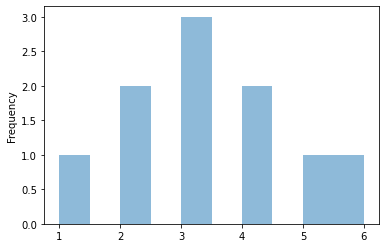

In [48]:
experim1.plot.hist(alpha=0.5)

<h2 style="color:blue; background-color:#F3F2F9">Mesclagem (<i>Merge</i>)</h2>

* Concatenação: O **Pandas** oferece vários recursos para combinar facilmente objetos (Séries e DataFrames) com vários tipos de lógica de conjunto para os índices e funcionalidade de álgebra relacional no caso de operações do tipo _join/merge_.

In [50]:
df5 = pd.DataFrame(np.random.randn(10, 4))       # valores aleatórios normalmente distribuídos em 10 linhas e 4 colunas
df5

,0,1,2,3
0,0.896650,-0.522257,0.262716,-0.672647
1,1.392995,1.691071,0.060406,-0.284204
2,0.622053,1.272420,0.884139,0.847405
3,-1.252459,-0.960656,-1.172303,-0.494864
4,-0.813478,-0.049195,1.149324,-0.640582
5,-1.670434,-0.046646,2.447664,-1.641226
6,0.089902,-1.691609,-0.464067,-0.257993
7,0.208375,0.046142,-0.707078,-0.042070
8,-0.132306,-1.061486,-1.717351,0.905559
9,-0.865825,0.918368,0.736405,1.199637


Dividindo o dataframe `df5` em pedaços e reunindo os pedaços depois:

In [52]:
pedacos = [df5[:3], df5[3:7], df5[7:]]
pedacos

[          0         1         2         3
 0  0.896650 -0.522257  0.262716 -0.672647
 1  1.392995  1.691071  0.060406 -0.284204
 2  0.622053  1.272420  0.884139  0.847405,
           0         1         2         3
 3 -1.252459 -0.960656 -1.172303 -0.494864
 4 -0.813478 -0.049195  1.149324 -0.640582
 5 -1.670434 -0.046646  2.447664 -1.641226
 6  0.089902 -1.691609 -0.464067 -0.257993,
           0         1         2         3
 7  0.208375  0.046142 -0.707078 -0.042070
 8 -0.132306 -1.061486 -1.717351  0.905559
 9 -0.865825  0.918368  0.736405  1.199637]

In [53]:
pd.concat(pedacos)

,0,1,2,3
0,0.896650,-0.522257,0.262716,-0.672647
1,1.392995,1.691071,0.060406,-0.284204
2,0.622053,1.272420,0.884139,0.847405
3,-1.252459,-0.960656,-1.172303,-0.494864
4,-0.813478,-0.049195,1.149324,-0.640582
5,-1.670434,-0.046646,2.447664,-1.641226
6,0.089902,-1.691609,-0.464067,-0.257993
7,0.208375,0.046142,-0.707078,-0.042070
8,-0.132306,-1.061486,-1.717351,0.905559
9,-0.865825,0.918368,0.736405,1.199637


**Obs.**: Adicionar uma coluna a um DataFrame é relativamente rápido. No entanto, adicionar uma linha requer uma cópia e dependendo do tamanho do DataFrame isso pode ser computacionalmente dispendioso. Recomenda-se passar uma lista pré-criada de registros para o construtor DataFrame ao invés de construir o DataFrame anexando registros iterativamente a ele. Para mais informações acesse [Mesclar, Ajuntar, Concatenar e Comparar](https://pandas.pydata.org/docs/user_guide/merging.html#merging-concatenation).

<h3 style="color:red"><b>Exercício</b></h3>Transforme o dataframe anterior, <b><tt>df5</tt></b>, de modo que as linhas 4, 5 e 6 passem a ocupar as últimas linhas.

<h2 style="color:blue; background-color:#F3F2F9">União</h2>
União de dados no estilo SQL.

In [58]:
a = pd.DataFrame({"chave":["item", "item"], "valorA":[1, 2]})
b = pd.DataFrame({"chave":["item", "item"], "valorB":[4, 5]})
print(a); print(b)

  chave  valorA
0  item       1
1  item       2
  chave  valorB
0  item       4
1  item       5


In [59]:
pd.merge(a, b, on="chave")

,chave,valorA,valorB
0,item,1,4
1,item,1,5
2,item,2,4
3,item,2,5


Outro exemplo:

In [60]:
a = pd.DataFrame({"chave":["item", "val"], "valorA":[1, 2]})
b = pd.DataFrame({"chave":["item", "val"], "valorB":[4, 5]})
print(a); print(b)

  chave  valorA
0  item       1
1   val       2
  chave  valorB
0  item       4
1   val       5


In [61]:
pd.merge(a, b, on="chave")

,chave,valorA,valorB
0,item,1,4
1,val,2,5


<h2 style="color:blue; background-color:#F3F2F9">Agrupamento</h2>

O **Agrupamento** é um processo que envolve uma ou mais das seguintes etapas:

1. Dividir os dados em grupos com base em alguns critérios.
2. Aplicar uma função a cada grupo independentemente.
3. Combinar os resultados em uma estrutura de dados.

In [64]:
df6 = pd.DataFrame( { "A": ["item", "valor", "item", "valor", "item", "valor", "item", "item"],
                     "B": ["um", "um", "dois", "três", "dois", "dois", "um", "três"],
                     "C": np.random.randn(8),
                     "D": np.random.randn(8), } )
df6

,A,B,C,D
0,item,um,0.368465,0.833627
1,valor,um,0.236693,-0.675075
2,item,dois,2.063737,0.612448
3,valor,três,0.536142,0.336975
4,item,dois,-1.326727,-1.123182
5,valor,dois,-1.078908,0.876692
6,item,um,-0.363955,0.182970
7,item,três,-0.038223,-1.121280


Agrupando e aplicando a função `sum()` aos grupos resultantes.

In [65]:
df6.groupby(["A", "B"]).sum()

C         D
A     B                       
item  dois  0.737010 -0.510734
      três -0.038223 -1.121280
      um    0.004510  1.016597
valor dois -1.078908  0.876692
      três  0.536142  0.336975
      um    0.236693 -0.675075

<h2 style="color:blue; background-color:#F3F2F9">Remodelando</h2>
<h3 style="color:blue; background-color:#F3F2F9">Empilhamento</h3>

In [67]:
tuplas = list(zip( *[ ["barra", "barra", "bazar", "bazar", "item", "item", "qui", "qui"],
                      ["um", "dois", "um",  "dois", "um", "dois", "um", "dois"], ] ))
indice = pd.MultiIndex.from_tuples(tuplas, names=["primeiro", "segundo"])
df7 = pd.DataFrame(np.random.randn(8, 2), index=indice, columns=["A", "B"])
df8 = df7[:4]
df8

A         B
primeiro segundo                    
barra    um      -0.914160 -1.466732
         dois    -0.255683  0.769011
bazar    um       1.928723 -0.953505
         dois    -1.744472 -1.726661

O método `stack()` "compacta" um nível nas colunas do DataFrame.

In [68]:
empilhado = df8.stack()
empilhado

primeiro  segundo   
barra     um       A   -0.914160
                   B   -1.466732
          dois     A   -0.255683
                   B    0.769011
bazar     um       A    1.928723
                   B   -0.953505
          dois     A   -1.744472
                   B   -1.726661
dtype: float64

Com uma estrutura de dados "empilhada" (DataFrame ou Série, tendo 'MultiIndex' como índice), a operação inversa de `stack()` é `unstack()`, que por padrão desempilha o último nível:

In [69]:
empilhado.unstack()        # ou empilhado.unstack(0)

A         B
primeiro segundo                    
barra    dois    -0.255683  0.769011
         um      -0.914160 -1.466732
bazar    dois    -1.744472 -1.726661
         um       1.928723 -0.953505

In [70]:
empilhado.unstack(1)

segundo         dois        um
primeiro                      
barra    A -0.255683 -0.914160
         B  0.769011 -1.466732
bazar    A -1.744472  1.928723
         B -1.726661 -0.953505

<h3 style="color:blue; background-color:#F3F2F9">Tabelas Dinâmicas</h3>

In [71]:
df9 = pd.DataFrame( { "A": ["um", "um", "dois", "três"] * 3,
                     "B": ["A", "B", "C"] * 4,
                     "C": ["item", "item", "item", "mar", "mar", "mar"] * 2,
                     "D": np.random.randn(12),
                     "E": np.random.randn(12), } )
df9

,A,B,C,D,E
0,um,A,item,0.180946,0.472359
1,um,B,item,0.086992,-0.580410
2,dois,C,item,0.194569,-0.626423
3,três,A,mar,0.985247,0.440178
4,um,B,mar,-1.711754,1.186297
5,um,C,mar,-0.625247,1.081480
6,dois,A,item,-1.219121,0.430328
7,três,B,item,-2.320987,1.076534
8,um,C,item,0.192274,1.027539
9,um,A,mar,0.994189,0.560579


Podemos produzir tabelas dinâmicas a partir desses dados com muita facilidade:

In [72]:
pd.pivot_table(df9, values="D", index=["A", "B"], columns=["C"])

C           item       mar
A    B                    
dois A -1.219121       NaN
     B       NaN -0.781614
     C  0.194569       NaN
três A       NaN  0.985247
     B -2.320987       NaN
     C       NaN -0.564590
um   A  0.180946  0.994189
     B  0.086992 -1.711754
     C  0.192274 -0.625247

<h2 style="color:blue; background-color:#F9EDEF">Exemplo de <i>DataFrame</i></h2>

In [26]:
import pandas as pd
# criando um dataframe a partir de um dicionário
data = {'País':['Portugal', 'Peru', 'Chile'],'Capital':['Lisboa', 'Lima', 'Santiago'],'População':[751000, 1120000, 695000]}
df = pd.DataFrame(data, columns=['País', 'Capital', 'População'])
df

,País,Capital,População
0,Portugal,Lisboa,751000
1,Peru,Lima,1120000
2,Chile,Santiago,695000


<h1 style="color:blue; background-color:#E0DBF9; text-align:center">Fundamentos Teóricos</h1>

<h2 style="color:blue; background-color:#F3F2F9">Estruturas de Dados: <i>DataFrame</i> e <i>Series</i></h2>

As estruturas de dados primárias do **Pandas** são implementadas por duas classes: 

- **DataFrame** - uma espécie de tabela de dados relacionais, com linhas e colunas nominadas. 
- **Series** - uma espécie de coleção de dados de coluna única. 

Dimensões | Nome | Descrição  
:---: | :--- | :----
1 | matriz 1D | rotulada de forma homogênea  
2 | DataFrame Geral | Estrutura tabular de tamanho marcado, mutável em 2D, com coluna potencialmente tipificada de forma heterogênea  

As estruturas de dados do **Pandas** podem ser consideradas como contêineres flexíveis para dados de baixa dimensionalidade: o **DataFrame** é um contêiner para várias séries e **Series** é um contêiner para vários escalares.

Um **DataFrame** contém uma ou mais **Series** e um nome para cada série. 

_DataFrame_ é uma abstração comumente usada na manipulação de muitos dados. Implementações semelhantes existem no **Apache Spark** (mecanismo de análise unificada para processamento de _big data_, com módulos internos para _streaming_, SQL, _Machine Learning_ e processamento de gráficos) e na linguagem _open source_ **R** (linguagem de programação multi-paradigma especializada em manipulação, análise e visualização gráfica de dados e estatísticas).

A documentação do pacote **Pandas** define *DataFrame* como uma “estrutura de dados tabular bidimensional, mutável em tamanho e potencialmente heterogênea com eixos rotulados (linhas e colunas)”. De forma simples, podemos dizer que *DataFrame* é uma tabela de dados.

Para se criar uma série basta construir um objeto das classes **Series** ou **Dataframe**.   
Por exemplo:

In [4]:
pd.Series(['Curitiba', 'Manaus', 'Porto Velho', 'Natal', 'Goiânia'])

0       Curitiba
1         Manaus
2    Porto Velho
3          Natal
4        Goiânia
dtype: object

<h2 style="color:blue; background-color:#F3F2F9">Séries Temporais</h2>

O **Pandas** tem uma funcionalidade simples, poderosa e eficiente para realizar operações de reamostragem durante a conversão de frequência (por exemplo: conversão de dados em segundos em dados de 5 minutos). 

In [79]:
interv = pd.date_range("1/1/2021", periods=100, freq="S")      # intervalos de tempo a cada segundo
# print(interv)
st = pd.Series(np.random.randint(1, 61, len(interv)), index=interv)
st.resample("5 min").sum()

2021-01-01    2812
Freq: 5T, dtype: int32

Representação de fuso horário:

In [81]:
interv = pd.date_range("3/6/2020 00:00", periods=5, freq="D")   # intervalos de tempo a cada dia
print(interv)
st = pd.Series(np.random.randint(len(interv)), interv)
st

DatetimeIndex(['2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10'],
              dtype='datetime64[ns]', freq='D')


2020-03-06    2
2020-03-07    2
2020-03-08    2
2020-03-09    2
2020-03-10    2
Freq: D, dtype: int64

In [83]:
st_utc = st.tz_localize("UTC")
st_utc

2020-03-06 00:00:00+00:00    2
2020-03-07 00:00:00+00:00    2
2020-03-08 00:00:00+00:00    2
2020-03-09 00:00:00+00:00    2
2020-03-10 00:00:00+00:00    2
Freq: D, dtype: int64

Convertendo para outro fuso horário:

In [86]:
st_utc.tz_convert("America/Sao_Paulo")

2020-03-05 21:00:00-03:00    2
2020-03-06 21:00:00-03:00    2
2020-03-07 21:00:00-03:00    2
2020-03-08 21:00:00-03:00    2
2020-03-09 21:00:00-03:00    2
Freq: D, dtype: int64

Conversão entre representações de intervalo de tempo:

In [87]:
interv = pd.date_range("1/1/2012", periods=5, freq="M")        # intervalos de tempo a cada mêsb
st = pd.Series(np.random.randn(len(interv)), index=interv)
st

2012-01-31   -1.749878
2012-02-29   -0.144381
2012-03-31   -0.283800
2012-04-30    0.123513
2012-05-31    0.286149
Freq: M, dtype: float64

In [93]:
sp = st.to_period()
sp

2012-01   -1.749878
2012-02   -0.144381
2012-03   -0.283800
2012-04    0.123513
2012-05    0.286149
Freq: M, dtype: float64

In [94]:
sp.to_timestamp()

2012-01-01   -1.749878
2012-02-01   -0.144381
2012-03-01   -0.283800
2012-04-01    0.123513
2012-05-01    0.286149
Freq: MS, dtype: float64

Objetos **DataFrame** podem ser criados passando-se os nomes das colunas numa _string_ de mapeamento, do tipo dicionário (`dict`) para suas respectivas séries. Se a série não corresponder em comprimento, os valores omissos serão preenchidos com valores especiais **NaN**.  

**Exemplo**: Estimativa populacional do Instituto Brasileiro de Geografia e Estatística ([IBGE](https://pt.wikipedia.org/wiki/Lista_de_capitais_do_Brasil_por_popula%C3%A7%C3%A3o)) para 1º de julho de 2018.

In [7]:
capitais = pd.Series(['Curitiba', 'Manaus', 'Porto Velho', 'Natal', 'Goiânia'])
populacao = pd.Series([1917185, 2145444, 519536, 877640, 1495705])
pd.DataFrame({ 'Nome da Cidade': capitais, 'Populacao': populacao })

,Nome da Cidade,Populacao
0,Curitiba,1917185
1,Manaus,2145444
2,Porto Velho,519536
3,Natal,877640
4,Goiânia,1495705


Categorias

In [95]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6], "nota_pura": ["a", "b", "b", "a", "a", "e"]})
df["nota"] = df["nota_pura"].astype("category")
df['nota']

0    a
1    b
2    b
3    a
4    a
5    e
Name: nota, dtype: category
Categories (3, object): ['a', 'b', 'e']

Vamos renomeiar as categorias com nomes mais significativos...

In [96]:
df["nota"].cat.categories = ["muito bom", "bom", "muito mal"]

Reordene as categorias e adicione simultaneamente as categorias ausentes (os métodos em Series.cat() retornam uma nova série normalmente).

In [97]:
df["nota"] = df["nota"].cat.set_categories(["muito mal", "mal", "médio", "bom", "muito bom"])
df["nota"]

0    muito bom
1          bom
2          bom
3    muito bom
4    muito bom
5    muito mal
Name: nota, dtype: category
Categories (5, object): ['muito mal', 'mal', 'médio', 'bom', 'muito bom']

A classificação é por ordem nas categorias, não por ordem lexical.

In [98]:
df.sort_values(by="nota")

,id,nota_pura,nota
5,6,e,muito mal
1,2,b,bom
2,3,b,bom
0,1,a,muito bom
3,4,a,muito bom
4,5,a,muito bom


O agrupamento por uma coluna de categoria também mostra categorias vazias.

In [99]:
df.groupby("nota").size()

nota
muito mal    1
mal          0
médio        0
bom          2
muito bom    3
dtype: int64

<h2 style="color:blue; background-color:#F3F2F9">Gráficos</h2>
<h3 style="color:blue; background-color:#F3F2F9">Leitura de Arquivo .CSV</h3>

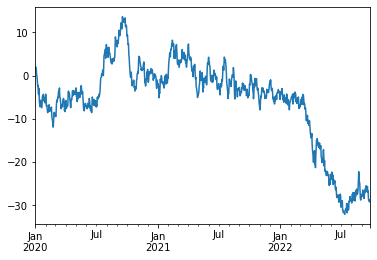

In [107]:
import matplotlib.pyplot as plt
plt.close("all")
st = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2020", periods=1000))
st = st.cumsum()
st.plot();

Em um DataFrame, o método plot () é uma conveniência para plotar todas as colunas com rótulos:

<Figure size 432x288 with 0 Axes>

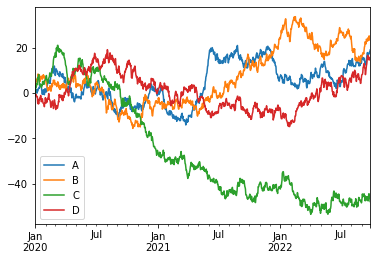

In [121]:
df = pd.DataFrame(np.random.randn(1000, 4), index=st.index, columns=["A", "B", "C", "D"])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

<h2 style="color:blue; background-color:#F3F2F9">E/S de Dados</h2>
<h3 style="color:blue; background-color:#F3F2F9">Leitura de Arquivo .CSV</h3>

Normalmente se carrega um arquivo inteiro num **DataFrame**. O exemplo seguinte carrega um arquivo com dados de habitação do estado da Califórnia, EUA. Execute a seguinte célula para carregar os dados e criar definições de recursos:

In [36]:
# seu computador precisa ter acesso à Internet...
pop_CA_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
pop_CA_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


O exemplo acima usou `DataFrame.describe()` para mostrar estatísticas interessantes sobre um **DataFrame**. Outras funções bastante úteis são: `DataFrame.head()` que exibe os primeiros registros de um **DataFrame** e `DataFrame.tail()` que exibe as últimas linhas:

In [41]:
pop_CA_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [52]:
pop_CA_df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0
16999,-124.35,40.54,52.0,1820.0,300.0,806.0,270.0,3.0147,94600.0


<h3 style="color:blue; background-color:#F3F2F9">Escrita em Arquivo .CSV</h3>

In [44]:
import os
pop_CA_df.to_csv('CA_EUA.csv')
print(os.getcwd())
print(os.listdir('.'))   # Lista todos os arquivos e diretórios na pasta corrente

E:\python\curso_ifg\básico\08.19\2_Packages
['.ipynb_checkpoints', 'CA_EUA.csv', 'dat', 'img', 'matplotlib.ipynb', 'Modulos_Cientificos - Copia.ipynb', 'Numpy.ipynb', 'pandas.ipynb', 'Python e outras Linguagens.ipynb', 'rosto.py', 'scipy.ipynb']


<h3 style="color:blue; background-color:#F3F2F9">Escrita de um Dataframe em Planilha (Arquivo Excel)</h3>

In [47]:
df.to_excel('populacao.xlsx')
print(os.listdir('.'))   # Lista todos os arquivos e diretórios na pasta corrente

['.ipynb_checkpoints', 'CA_EUA.csv', 'dat', 'img', 'matplotlib.ipynb', 'Modulos_Cientificos - Copia.ipynb', 'Numpy.ipynb', 'pandas.ipynb', 'populacao.xlsx', 'Python e outras Linguagens.ipynb', 'rosto.py', 'scipy.ipynb']


<h3 style="color:blue; background-color:#F3F2F9">Leitura de Planilha (Arquivo Excel) em Dataframe</h3>

In [48]:
df

,País,Capital,População
0,Portugal,Lisboa,751000
1,Peru,Lima,1120000
2,Chile,Santiago,695000


In [54]:
del df
df

NameError: name 'df' is not defined

In [57]:
df = pd.read_excel('populacao.xlsx')
df

,Unnamed: 0,País,Capital,População
0,0,Portugal,Lisboa,751000
1,1,Peru,Lima,1120000
2,2,Chile,Santiago,695000


Outra característica poderosa do pacote **pandas** é a sua representação gráfica de dados. Por exemplo, o método `DataFrame.hist()` permite apresentar rapidamente a distribuição de valores de uma série (coluna):

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000009A42815E48>]],
      dtype=object)

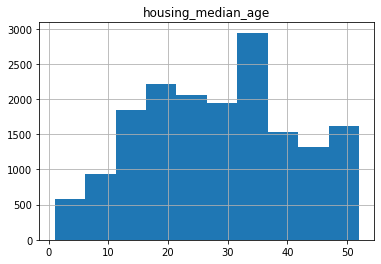

In [39]:
pop_CA_df.hist('housing_median_age')

<h2 style="color:blue; background-color:#F3F2F9">Acessando Dados</h2>

Você pode acessar dados do **DataFrame** usando operações conhecidas de dicionários/listas do Python:

In [8]:
cidades = pd.DataFrame({ 'Capital': capitais, 'Populacao': populacao })
print(type(cidades['Capital']))

<class 'pandas.core.series.Series'>


In [9]:
cidades['Capital']

0       Curitiba
1         Manaus
2    Porto Velho
3          Natal
4        Goiânia
Name: Capital, dtype: object

In [10]:
cidades

,Capital,Populacao
0,Curitiba,1917185
1,Manaus,2145444
2,Porto Velho,519536
3,Natal,877640
4,Goiânia,1495705


In [66]:
print(cidades['Capital'][2], cidades.iloc[2][0], cidades.at[2,'Capital'], cidades.iat[2,0], sep=', ')

Porto Velho, Porto Velho, Porto Velho, Porto Velho


In [12]:
print(type(cidades['Capital'][2]))

<class 'str'>


In [13]:
cidades[0:2]

,Capital,Populacao
0,Curitiba,1917185
1,Manaus,2145444


Além disso, o Pandas oferece uma API extremamente rica para seleção e indexação avançada.

<h3 style="color:blue; background-color:#F3F2F9">Acrescentando Coluna</h3>

In [70]:
print("Acrescentando uma nova coluna como Série:")
cidades['Estado'] = pd.Series(["PR","AM","RD","RN","GO"])
cidades

Acrescentando uma nova coluna como Série:


,Capital,Populacao,Area (km2),Densidade Populacional (hab/km2),Estado
0,Curitiba,1917185,434.967,4407.656213,PR
1,Manaus,2145444,11401.058,188.179378,AM
2,Porto Velho,519536,34082.366,15.243543,RD
3,Natal,877640,170.298,5153.554358,RN
4,Goiânia,1495705,739.492,2022.611468,GO


<h3 style="color:blue; background-color:#F3F2F9">Retirando Coluna</h3>

In [77]:
print(cidades['Estado'])
cidades.pop('Estado')
cidades

0    PR
1    AM
2    RD
3    RN
4    GO
Name: Estado, dtype: object


,Capital,Populacao,Area (km2),Densidade Populacional (hab/km2)
0,Curitiba,1917185,434.967,4407.656213
1,Manaus,2145444,11401.058,188.179378
2,Porto Velho,519536,34082.366,15.243543
3,Natal,877640,170.298,5153.554358
4,Goiânia,1495705,739.492,2022.611468


<h3 style="color:blue; background-color:#F3F2F9">Manipulando Dados </h3>

Você pode aplicar as operações aritméticas básicas do Python a um objeto **Series**.  
Por exemplo:  

In [14]:
populacao

0    1917185
1    2145444
2     519536
3     877640
4    1495705
dtype: int64

In [15]:
populacao/1000

0    1917.185
1    2145.444
2     519.536
3     877.640
4    1495.705
dtype: float64

Uma série do **pandas** pode ser usada como argumento na maioria das funções do pacote **numpy**:

In [17]:
import numpy as np
np.log(populacao)

0    14.466369
1    14.578857
2    13.160691
3    13.684992
4    14.218108
dtype: float64

Para transformações mais complexas numa única coluna (série), usa-se o método `Series.apply()`. Assim como a função incorporada `map()` do Python, o método `Series.apply()` aceita como argumento uma função **lambda**, a qual é aplicada a cada valor da série. O exemplo seguinte cria um objeto **Series** que indica se a população da cidade é superior a um milhão:

In [18]:
populacao.apply(lambda pop: pop > 1000000)

0     True
1     True
2    False
3    False
4     True
dtype: bool

Modificar o conteúdo de um **DataFrame** também é simples. Por exemplo, o código seguinte adiciona duas séries a um **DataFrame** existente:

In [21]:
cidades['Area (km2)'] = pd.Series([434.967, 11401.058, 34082.366, 170.298, 739.492])
cidades['Densidade Populacional (hab/km2)'] = cidades['Populacao'] / cidades['Area (km2)']
cidades

,Capital,Populacao,Area (km2),Densidade Populacional (hab/km2)
0,Curitiba,1917185,434.967,4407.656213
1,Manaus,2145444,11401.058,188.179378
2,Porto Velho,519536,34082.366,15.243543
3,Natal,877640,170.298,5153.554358
4,Goiânia,1495705,739.492,2022.611468


<h3 style="color:red"><b>Exercício</b></h3>
Modifique a tabela de cidades adicionando uma nova coluna booleana, com valor `True` se, e somente se, as duas opções forem verdadeiras: 
- A cidade tem nome feminino (termina com a letra 'a'). 
- A cidade tem uma área menor que 1000 km$^2$. 

**Obs.**: As séries booleanas são combinadas usando os operadores bit a bit, ao invés dos tradicionais booleanos. Por exemplo, ao executar a lógica ‘e’ use o operador '&' em vez de `and`. 

In [54]:
cidades['Pequena e Feminina'] = (cidades['Area (km2)'] < 1000) & cidades['Capital'].apply(lambda nome: nome.endswith('a'))
cidades

,Capital,Populacao,Area (km2),Densidade Populacional (hab/km2),Pequena e Feminina
0,Curitiba,1917185,434.967,4407.656213,True
1,Manaus,2145444,11401.058,188.179378,False
2,Porto Velho,519536,34082.366,15.243543,False
3,Natal,877640,170.298,5153.554358,False
4,Goiânia,1495705,739.492,2022.611468,True


<h2 style="color:blue; background-color:#F3F2F9">Índices</h2>

Os objetos **Series** e **DataFrame** também definem uma propriedade `index` que designa um valor de identificador para cada item da **Serie** ou linha do **DataFrame**. Por padrão, na construção, o pacote **pandas** atribui valores de índice que refletem a ordenação dos dados de origem. Uma vez criados, os valores do índice são estáveis; isto é, eles não mudam quando os dados são reordenados.

In [55]:
cidades.index

RangeIndex(start=0, stop=5, step=1)

Chame a função `DataFrame.reindex()` para reorganizar manualmente as linhas.  
Por exemplo, o seguinte comando tem o mesmo efeito da classificação por nome da cidade:

In [56]:
cidades

,Capital,Populacao,Area (km2),Densidade Populacional (hab/km2),Pequena e Feminina
0,Curitiba,1917185,434.967,4407.656213,True
1,Manaus,2145444,11401.058,188.179378,False
2,Porto Velho,519536,34082.366,15.243543,False
3,Natal,877640,170.298,5153.554358,False
4,Goiânia,1495705,739.492,2022.611468,True


In [57]:
cidades.reindex([0, 4, 1, 3, 2])

,Capital,Populacao,Area (km2),Densidade Populacional (hab/km2),Pequena e Feminina
0,Curitiba,1917185,434.967,4407.656213,True
4,Goiânia,1495705,739.492,2022.611468,True
1,Manaus,2145444,11401.058,188.179378,False
3,Natal,877640,170.298,5153.554358,False
2,Porto Velho,519536,34082.366,15.243543,False


Reindexar é uma ótima maneira de embaralhar (randomizar) um **DataFrame**. No exemplo seguinte, pegamos o índice, que é semelhante a um vetor, e o passamos para a função `random.permutation()` do **numpy**, para embaralhar esses valores. Chamar a reindexação com o vetor embaralhado faz com que as linhas do **DataFrame** sejam embaralhadas da mesma maneira.  
Execute a célula seguinte várias vezes!

In [61]:
cidades.reindex(np.random.permutation(cidades.index))

,Capital,Populacao,Area (km2),Densidade Populacional (hab/km2),Pequena e Feminina
3,Natal,877640,170.298,5153.554358,False
0,Curitiba,1917185,434.967,4407.656213,True
2,Porto Velho,519536,34082.366,15.243543,False
1,Manaus,2145444,11401.058,188.179378,False
4,Goiânia,1495705,739.492,2022.611468,True


<h3 style="color:red"><b>Exercício</b></h3>

O método de reindexação permite valores de índice que não estão nos valores de índice do **DataFrame** original. Experimente e veja o que acontece ao usar índices inexistentes! Por que você acha que isso é permitido?

<u>Solução</u>: Se o vetor de entrada de reindexação incluir valores que não estão nos valores originais do índice **DataFrame**, a função `reindex()` incluirá novas linhas para esses índices "ausentes" e preencherá todas as colunas correspondentes com valores `NaN`:

In [62]:
cidades.reindex([0, 4, 5, 2])

,Capital,Populacao,Area (km2),Densidade Populacional (hab/km2),Pequena e Feminina
0,Curitiba,1917185.0,434.967,4407.656213,True
4,Goiânia,1495705.0,739.492,2022.611468,True
5,NaN,NaN,NaN,NaN,NaN
2,Porto Velho,519536.0,34082.366,15.243543,False


Esse comportamento é desejável porque os índices são geralmente cadeias de caracteres extraídos dos dados reais (consulte a documentação sobre `reindex()` do **pandas** para obter um exemplo em que os valores de índice são nomes de navegadores). 

Nesse caso, permitir índices "ausentes" facilita a reindexação usando uma lista externa, já que não se precisa preocupar com a limpeza da entrada.

<h2 style="color:blue; background-color:#F3F2F9">Informações sobre <i>Séries</i> e <i>Data Frames</i></h2>
<h3 style="color:blue; background-color:#F3F2F9">Informações Básicas</h3>

In [27]:
df.shape                    # (linhas, colunas)
df.index                    # Descreve o índice 
df.columns                  # Descreve as colunas 
df.info()                   # informações sobre o data frame  
df.count()                  # qtde de valores não-NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
País         3 non-null object
Capital      3 non-null object
População    3 non-null int64
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes


País         3
Capital      3
População    3
dtype: int64

#### Resumos

In [28]:
df.sum()                      # soma dos valores

País          PortugalPeruChile
Capital      LisboaLimaSantiago
População               2566000
dtype: object

In [29]:
df.cumsum()                   # soma acumulada

,País,Capital,População
0,Portugal,Lisboa,751000
1,PortugalPeru,LisboaLima,1871000
2,PortugalPeruChile,LisboaLimaSantiago,2566000


In [30]:
df.min(), df.max()            # valores mín e máx

(País          Chile
 Capital        Lima
 População    695000
 dtype: object, País         Portugal
 Capital      Santiago
 População     1120000
 dtype: object)

In [31]:
df.describe()                 # resumo estatístico

,População
count,3.000000e+00
mean,8.553333e+05
std,2.309120e+05
min,6.950000e+05
25%,7.230000e+05
50%,7.510000e+05
75%,9.355000e+05
max,1.120000e+06


In [33]:
df.mean()                       # média dos valores

População    855333.333333
dtype: float64

In [34]:
df.median()                     # mediana dos valores

População    751000.0
dtype: float64

<h3 style="color:red"><b>Exemplo</b></h3>  

**Enviar e-mail para uma lista de e-mails de uma planilha.**

Hoje em dia, trabalhar com formulários do Google é bastante comum. Eles são usados para reunir informações em massa com facilidade. Os endereços de e-mail são uma das informações mais solicitadas, e nesse caso, estão armazenados em uma planilha. Missão: enviar um e-mail para cada um dos endereços de e-mail presentes na planilha.

* Etapa 1: Ler a planilha usando o pacote **pandas**. A estrutura da planilha usada aqui é:  
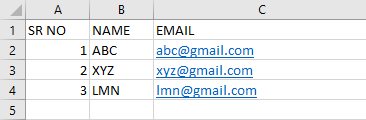  
* Etapa 2: Estabelecer conexão com uma conta do **gmail** usando o pacote **smtplib**.  
* Etapa 3: Extrair os nomes e endereços de e-mail da planilha.  
* Etapa 4: Executar um loop e para cada registro e enviar um e-mail.  
* Etapa 5: Encerrar a conexão com o servidor **SMTP**.  

**Obs.**: Se a conta enviadora de e-mail via SMTP for Gmail, então vc precisa configura-la para diminuir o quesito segurança, permitindo o uso de aplicativos menos seguros na sua conta do Google. Siga este [link](https://dev-yakuza.posstree.com/en/django/gmail-smtp/)

In [33]:
import pandas as pd
import smtplib

seu_email = "prof.claudio.2008.2@gmail.com"
sua_password = "qwerty2008"
  
# estabelecendo conexão com gmail
servidor = smtplib.SMTP_SSL('smtp.gmail.com', 465)
servidor.ehlo()
conectado = True
print("Conectando ao servidor SMTP...")
try:
    servidor.login(seu_email, sua_password)
except smtplib.SMTPAuthenicationErroras ex:
    print(ex.args[0])
    print("Erro ao fazer login na conta de email!")
    conectado = False

if conectado:
    # lendo a planilha de dados
    print("Conectado!")
    lista_email = pd.read_excel('dat/emails.xlsx')

    # obtendo os nomes e os emails
    nomes = lista_email['NOME']
    emails = lista_email['EMAIL']

    # lê os registros e envia emails

    # print(nomes,emails)
    for i in range(len(emails)):
        mensagem = "Olá " + nomes[i] + "!\n\nEmail de teste!"
        # print(mensagem.encode('utf-8'))
        servidor.sendmail(seu_email, [emails[i]], mensagem.encode('utf-8'))

# encerra conexão com o serivdor SMTP
servidor.close()
print("Missão cumprida!")

Conectando ao servidor SMTP...
Conectado!


<h3 style="color:red"><b>Exemplo</b></h3>  

**Como extrair a coluna E-mail do arquivo Excel e descobrir o tipo de e-mail.**

Vamos usar um arquivo Excel com as seguintes informações (ver figura seguinte) e disponível na pasta `dat` deste documento (Jupyter Notebook):
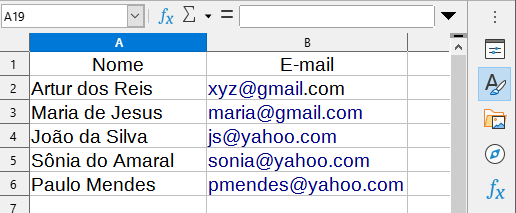

Abordagem:  
- Importe o módulo necessário.
- Importe dados do arquivo Excel.
- Crie uma coluna extra para cada domínio de e-mail diferente.
- Defina um índice, necessário para pesquisa.
- Defina o domínio do e-mail.
- Pesquise o e-mail e atribua à respectiva coluna no *Dataframe*.

Resultado esperado:
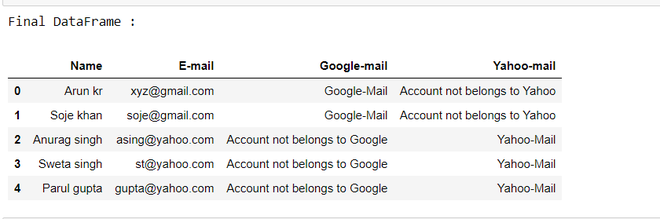

In [38]:
# importing required module
import pandas as pd
import re

# Criando df a partir dos dados da planilha Excel
dados = pd.read_excel("dat/agenda.xlsx")
print("DataFrame original:\n", dados)

# Criando colunas, uma cada tipo de e-mail
dados['Google-mail'] = None
dados['Yahoo-mail'] = None

# criando índices
ind_conj  = dados.columns.get_loc('E-mail')
ind_gmail = dados.columns.get_loc('Google-mail')
ind_yahoo = dados.columns.get_loc('Yahoo-mail')

# define o padrão do e-mail
padraoGoogle = 'gmail.com'
padraoYahoo  = 'yahoo.com'

# Busca e-mail e armazena no DataFrame
for linha in range(0, len(dados)):
	if re.search(padraoGoogle, dados.iat[linha, ind_conj]) == None:
		dados.iat[linha, ind_gmail] = 'Conta não pertence ao Google'
	else:
		gmail = re.search(padraoGoogle,
						dados.iat[linha, ind_conj]).group()
		dados.iat[linha, ind_gmail] = "E-mail Google"

	if re.search(padraoYahoo,
				dados.iat[linha, ind_conj]) == None:
		dados.iat[linha, ind_yahoo] = 'Conta não pertence ao Yahoo'
	else:
		yahoo = re.search(padraoYahoo, dados.iat[linha, ind_conj]).group()
		dados.iat[linha, ind_yahoo] = "E-mail Yahoo"

dados

DataFrame original:
               Nome             E-mail
0   Artur dos Reis      xyz@gmail.com
1   Maria de Jesus    maria@gmail.com
2    João da Silva       js@yahoo.com
3  Sônia do Amaral    sonia@yahoo.com
4     Paulo Mendes  pmendes@yahoo.com


,Nome,E-mail,Google-mail,Yahoo-mail
0,Artur dos Reis,xyz@gmail.com,E-mail Google,Conta não pertence ao Yahoo
1,Maria de Jesus,maria@gmail.com,E-mail Google,Conta não pertence ao Yahoo
2,João da Silva,js@yahoo.com,Conta não pertence ao Google,E-mail Yahoo
3,Sônia do Amaral,sonia@yahoo.com,Conta não pertence ao Google,E-mail Yahoo
4,Paulo Mendes,pmendes@yahoo.com,Conta não pertence ao Google,E-mail Yahoo


<img src='img/mediana.gif' alt='Imagem das medianas de um triângulo.' style='float:right;width:400'>

<h3 style="color:blue; background-color:#F3F2F9">Lembretes</h3>

1. **Mediana**: substantivo feminino.  
   1.1.	GEOMETRIA: segmento de reta que liga o vértice de um triângulo retângulo ao meio do lado oposto.  
   1.2.	ESTATÍSTICA: valor que divide um conjunto de valores ordenados em partes iguais (o valor do meio de um conjunto de dados).


2. **Hashable Type** - Em Python, qualquer objeto imutável (cujo conteúdo não muda durante sua existência no espaço de nomes) como um inteiro, um booleano, uma string, uma tupla, é considerado um tipo de dados *hashable*. Isso permite que o Python crie um valor **hash** exclusivo para identificá-lo, que pode ser usado por dicionários para rastrear chaves exclusivas e conjuntos para rastrear valores exclusivos.  


3. **Curiosidades** - Para encontrar o caminho (diretórios) de seu caderno Juýter (**Jupyter Notebook**) podemos usar o módulo de sistema operacional, o pacote `os`. O módulo OS é usado para acessar as funcionalidades (comandos) do sistema operacional. Para encontrar o diretório de seu trabalho atual use a função `os.getcwd()`. A função `os.listdir()` pode ser usada para exibir todos os arquivos no diretório. Você também pode alterar seu diretório de trabalho atual para outro diretório, usando `os.chdir()`.

In [42]:
import os
print("Diretório do Caderno Jupyter:", os.getcwd())
print("Arquivos no Diretório do Caderno Jupyter:\n", os.listdir(os.getcwd()))

Diretório do Caderno Jupyter: D:\python\cursos\curso_ifg\1_basico\202104\2_Packages
Arquivos no Diretório do Caderno Jupyter:
 ['.ipynb_checkpoints', '0.Módulos_Científicos.ipynb', '1.Numpy.ipynb', '2.Matplotlib.ipynb', '3.Scipy.ipynb', '4.Pandas.ipynb', '5.OpenCV.ipynb', '6.Análise_AR.ipynb', '7.ExpressãoRegular.ipynb', 'dat', 'img', 'Manual Expressões Regulares em Python.pdf', 'prog1.py', 'Python e outras Linguagens.ipynb', 'Python para Engenheiros.ipynb', 'regular expression regex.pdf', 'rosto.py', 'rotacao.py', 'src', 'teste_video.mp4', 'Trabalho_1.ipynb', 'Untitled.ipynb', 'vetor_x.bin', 'vid', '[Anmol Parande] Understanding and Implementing the Viola-Jones Image Classification Algorithm (post,2019).pdf']


Fontes:
1. https://pandas.pydata.org/docs/user_guide/10min.html#min
1. https://medium.com/horadecodar/data-science-tips-02-como-usar-loc-e-iloc-no-pandas-fab58e214d87
1. https://towardsdatascience.com/6-lesser-known-pandas-plotting-tools-fda5adb232ef
1. https://www.shanelynn.ie/python-pandas-read-csv-load-data-from-csv-files/
1. https://pynative.com/python-pandas-dataframe/#h-what-is-dataframe-in-pandas


<p style="text-align:center;">>>>>> <a href="http:/notebooks/index.ipynb">Volta ao Índice... </a><<<<<

In [12]:
# arquivo palindromo.py
# palindromo (testa se a palavra é um palíndromo)
def palindromo(palavra):
    palavra = palavra.upper()
    p = ("" if palavra == palavra[::-1] else "não ")
    return (f"{palavra} {p}é um palíndromo")

print(palindromo("ANA"))
print(palindromo("TESTE"))

ANA é um palíndromo
TESTE não é um palíndromo
